<a href="https://colab.research.google.com/github/user4pranay/Crop-Yield/blob/main/Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wild Blueberry Yield prediction


---




## Process:



---
1. Building A Linear Regression Model
2. Using Flask to Deploy

---



# Model Preperation

###Step 1 collecting dataset

In [2]:
!git clone https://github.com/user4pranay/Crop-Yield.git

Cloning into 'Crop-Yield'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 24.75 KiB | 24.75 MiB/s, done.


###Step 2 Dependencies

In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn Flask

###Step 3 setup & optimisation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [5]:
dataframe = pd.read_csv('Crop-Yield/crop.csv')
dataframe.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:
#features
X = dataframe[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
#target
Y = dataframe[['yield']]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 36)

In [8]:
total_features = ['clonesize',
                  'honeybee', 'bumbles', 'andrena', 'osmia',
                  'MaxOfUpperTRange', 'MinOfUpperTRange',
                  'AverageOfUpperTRange',
                  'MaxOfLowerTRange', 'MinOfLowerTRange',
                  'AverageOfLowerTRange',
                  'RainingDays',
                  'AverageRainingDays',
                  'fruitset', 'fruitmass', 'seeds']
corr_matrix = dataframe[total_features].corr()


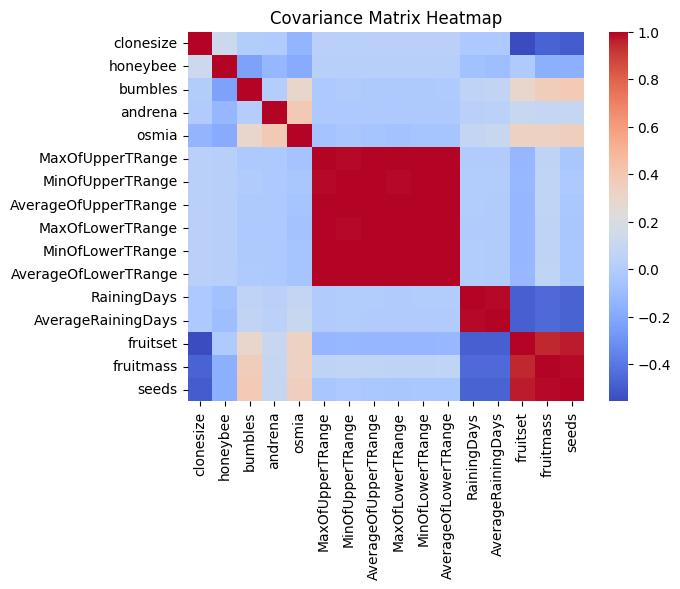

In [9]:
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()

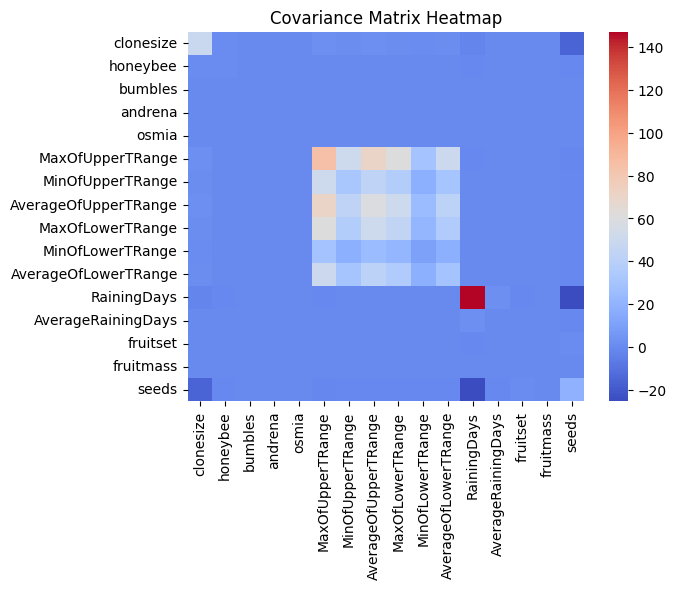

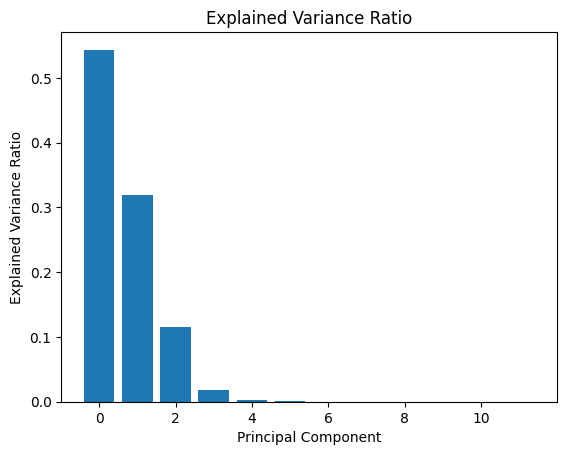

In [10]:
n_components = 12  # You can choose a different number

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(dataframe[total_features])

# Transformed data (principal components)
principal_components = pca.transform(dataframe[total_features])

# Covariance matrix of the original data
covariance_matrix = dataframe[total_features].cov()

# Heatmap for the covariance matrix
sns.heatmap(covariance_matrix, annot=False, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()

# Optional: Heatmap for the explained variance ratio (if using multiple components)
if n_components > 1:
    explained_variance = pca.explained_variance_ratio_
    plt.bar(range(n_components), explained_variance)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio')
    plt.show()

###Step 4 Model Training

In [11]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
Y_prediction = linear_reg_model.predict(X_test)
outcome = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_prediction.flatten()})
outcome

,Actual,Predicted
0,6677.624427,6839.486917
1,7884.567722,7822.721217
2,7380.633803,7228.001505
3,5948.114471,5937.804352
4,4125.757119,4054.719749
...,...,...
229,6870.342118,7022.851688
230,3049.260316,2927.844573
231,5945.899510,6050.334607
232,6801.492050,6716.317385


###Step 5 testing and dumping

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

print("Accuracy : ", r2_score(Y_test, Y_prediction))
print("Cross Validation : ", np.mean(cross_val_score(linear_reg_model, X_train, Y_train, cv = 10)))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(Y_test, Y_prediction)))

Accuracy :  0.9914973981883489
Cross Validation :  0.9895652696092215
Root Mean Squared Error :  125.01027012037682


In [14]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(linear_reg_model, f)

# Deploying model using a Flask App

###Step 1 Setup

In [15]:
import numpy as np
import sys
import os
from flask import Flask, request, render_template
import pickle
import pandas as pd




###Step 2 Loding Model and Seting Templates

In [16]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [17]:
form="""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Yield Prediction</title>
    <style>
        body {
            background-color: rgb(253, 237, 255);
            font-family: 'Arial', sans-serif;
            margin: 0;
            padding: 5vh;
            display: flex;
            flex-direction: column;
            align-items: center;
        }

        .container {
            width: 80%;
            background-color: rgba(255, 255, 255, 0.4);
            border-radius: 15px;
            padding: 20px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transition: all 0.3s ease;
        }

        .navbar {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding-bottom: 20px;
            border-bottom: 2px solid #ccc;
        }

        .title {
            font-size: 2em;
            color: #333;
        }

        .nav {
            list-style: none;
            display: flex;
            margin: 0;
            padding: 0;
        }

        .nav li {
            margin: 0 10px;
        }

        .nav li a {
            text-decoration: none;
            color: #333;
            font-weight: bold;
        }

        .nav li a:hover {
            color: #007BFF;
        }

        .home {
            margin-top: 20px;
        }

        .home p {
            font-size: 1.1em;
            color: #666;
        }

        form {
            display: flex;
            flex-direction: column;
            margin: 20px 0;
        }

        form label {
            margin-top: 10px;
            font-weight: bold;
        }

        form input[type="number"],
        form input[type="submit"] {
            padding: 10px;
            margin-top: 5px;
            border: 1px solid #ccc;
            border-radius: 5px;
            font-size: 1em;
        }

        form input[type="submit"] {
            background-color: #007BFF;
            color: white;
            cursor: pointer;
            font-weight: bold;
        }

        form input[type="submit"]:hover {
            background-color: #0056b3;
        }

        .prediction-box {
            margin-top: 20px;
            padding: 20px;
            border: 2px solid #007BFF;
            border-radius: 10px;
            background-color: #f0f8ff;
            font-size: 1.2em;
            font-weight: bold;
            text-align: center;
            color: #333;
        }

        .about {
            margin-top: 40px;
            padding: 20px;
            background-color: rgba(255, 255, 255, 0.9);
            border-radius: 15px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }

        .about h1 {
            font-size: 2em;
            color: #333;
        }

        .about p {
            font-size: 1em;
            color: #666;
            line-height: 1.6;
        }

        @media (max-width: 768px) {
            .container {
                width: 95%;
                padding: 15px;
            }

            .title {
                font-size: 1.5em;
            }

            .nav {
                flex-direction: column;
                align-items: flex-start;
            }

            .nav li {
                margin: 5px 0;
            }

            form input[type="number"],
            form input[type="submit"] {
                font-size: 0.9em;
                padding: 8px;
            }

            .home p {
                font-size: 1em;
            }

            .about h1 {
                font-size: 1.5em;
            }

            .about p {
                font-size: 0.9em;
            }
        }
    </style>
</head>
<body>
    <div class="container">
        <section class="navbar">
            <p class="title">Crop Yield Prediction</p>
            <ul class="nav">
                <li><a href="#home">Home</a></li>
                <li><a href="#about">About</a></li>
            </ul>
        </section>
        <section id="home" class="home">
            <p>Welcome to the Crop Yield Prediction Application! This tool helps you predict the yield of your crops based on various parameters. Please fill out the form below with accurate data to get the most precise prediction.</p>
            <p>Our prediction model uses parameters such as clone size, the presence of different types of bees, temperature ranges, and rainfall data to forecast the potential yield. Ensure you have all the necessary information at hand before you start filling out the form.</p>
            <form method="post">
                <label for="clonesize">Clone Size:</label>
                <input type="number" step="0.01" id="clonesize" name="clonesize" required>

                <label for="honeybee">Honeybee:</label>
                <input type="number" step="0.01" id="honeybee" name="honeybee" required>

                <label for="bumbles">Bumbles:</label>
                <input type="number" step="0.01" id="bumbles" name="bumbles" required>

                <label for="andrena">Andrena:</label>
                <input type="number" step="0.01" id="andrena" name="andrena" required>

                <label for="osmia">Osmia:</label>
                <input type="number" step="0.01" id="osmia" name="osmia" required>

                <label for="AverageOfUpperTRange">Average of Upper Temp Range:</label>
                <input type="number" step="0.01" id="AverageOfUpperTRange" name="AverageOfUpperTRange" required>

                <label for="AverageOfLowerTRange">Average of Lower Temp Range:</label>
                <input type="number" step="0.01" id="AverageOfLowerTRange" name="AverageOfLowerTRange" required>

                <label for="RainingDays">Raining Days:</label>
                <input type="number" step="0.01" id="RainingDays" name="RainingDays" required>

                <label for="AverageRainingDays">Average Raining Days:</label>
                <input type="number" step="0.01" id="AverageRainingDays" name="AverageRainingDays" required>

                <label for="fruitset">Fruit Set:</label>
                <input type="number" step="0.01" id="fruitset" name="fruitset" required>

                <label for="fruitmass">Fruit Mass:</label>
                <input type="number" step="0.01" id="fruitmass" name="fruitmass" required>

                <label for="seeds">Seeds:</label>
                <input type="number" step="0.01" id="seeds" name="seeds" required>

                <input type="submit" value="Predict">
            </form>

            {% if prediction is not none %}
                <p class="prediction-box">Predicted Yield: {{ prediction }}</p>
            {% endif %}
        </section>
        <section id="about" class="about">
            <h1>About:</h1>
            <p>
                This project was exclusively developed to serve as a practical application during the <b>AI, ML, and Data
                Science with Python</b> Training and Internship at <b>Ardent Computech Pvt Ltd</b>. Under the hood, it
                employs a Machine Learning Model based on Linear Regression for <b>Crop Yield Prediction</b> based on
                specific input parameters. The model has been meticulously trained using a carefully curated dataset.
                <br><br>The brainchild behind this project is <b>Pranay Pal</b>, a <b>3rd year B.E</b> Student majoring in
                <b>Information Technology</b> at the <b>University Institute of Technology.</b>
            </p>
        </section>
    </div>
</body>
</html>

"""

if not os.path.exists('./templates'):
    os.makedirs('./templates')


with open("./templates/index.html","w") as formfile :
  formfile.write(form)

###Step 3 exposing endpoints and running Flask App

In [18]:
from google.colab import output
output.serve_kernel_port_as_window(5000)

<IPython.core.display.Javascript object>

In [ ]:
App = Flask(__name__)
@App.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'GET':
        return render_template('index.html', prediction=None)

    if request.method == 'POST':
        # Get form data
        clonesize = float(request.form['clonesize'])
        honeybee = float(request.form['honeybee'])
        bumbles = float(request.form['bumbles'])
        andrena = float(request.form['andrena'])
        osmia = float(request.form['osmia'])
        AverageOfUpperTRange = float(request.form['AverageOfUpperTRange'])
        AverageOfLowerTRange = float(request.form['AverageOfLowerTRange'])
        RainingDays = float(request.form['RainingDays'])
        AverageRainingDays = float(request.form['AverageRainingDays'])
        fruitset = float(request.form['fruitset'])
        fruitmass = float(request.form['fruitmass'])
        seeds = float(request.form['seeds'])

        # Create a feature array
        features = np.array([[clonesize, honeybee, bumbles, andrena, osmia,
                              AverageOfUpperTRange, AverageOfLowerTRange,
                              RainingDays, AverageRainingDays, fruitset,
                              fruitmass, seeds]])

        # Make prediction
        prediction = model.predict(features)

        return render_template('index.html', prediction=prediction[0][0])

if __name__ == '__main__':
    App.run(port="5000")


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
